# Test three image alpha blend

In [3]:
import math
import numpy as np

# Import DiskFind utilities for PredatorEye.
import sys
sys.path.append('/content/drive/My Drive/PredatorEye/shared_code/')
import DiskFind as df

df.set_global_random_seed(20220113)

df.relative_disk_radius() = 0.09814453125
image_size = 128
disk_radius = 12.5625
disk_radius_int = 13
matte.shape = (26, 26, 1)
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  6 24 42 54 58 54 42 24  6  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  8 42 76 94 99 99 99 99 99 94 76 42  8  0  0  0  0  0  0 
 0  0  0  0  0  0 24 72 98 99 99 99 99 99 99 99 99 99 98 72 24  0  0  0  0  0 
 0  0  0  0  0 31 85 99 99 99 99 99 99 99 99 99 99 99 99 99 85 31  0  0  0  0 
 0  0  0  0 24 85 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 85 24  0  0  0 
 0  0  0  8 72 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 72  8  0  0 
 0  0  0 42 98 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 98 42  0  0 
 0  0  6 76 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 76  6  0 
 0  0 24 94 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 94 24  0 
 0 

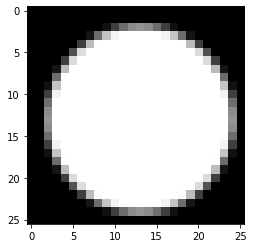

In [24]:
# See SO question "Numpy - multiple 3d array with a 2d array"
#     Based on this SO answer: https://stackoverflow.com/a/46930388/1991373
#     See also about np.tensordot: https://stackoverflow.com/a/46930585/1991373

print('df.relative_disk_radius() =', df.relative_disk_radius())

image_depth = 3
image_size = 128
# image_size = 3
# image_size = 32
disk_radius = image_size * df.relative_disk_radius()
disk_radius_int = round(disk_radius)
disk_diameter_int = disk_radius_int * 2
image_shape = (image_size, image_size, image_depth)
disk_shape = (disk_diameter_int, disk_diameter_int, image_depth)
disk_matte_shape = (disk_diameter_int, disk_diameter_int, 1)

print('image_size =', image_size)
print('disk_radius =', disk_radius)
print('disk_radius_int =', disk_radius_int)

# matte = np.ones(disk_matte_shape, dtype=np.float32)
matte = np.zeros(disk_matte_shape, dtype=np.float32)
print('matte.shape =', matte.shape)


# Draw soft-eged disk with given centerpoint and color.
# (Copied from Find_3_disks)
# def draw_disk(center, color):
def draw_disk(center, color, image):
    cx = int(center[0])
    cy = int(center[1])
    dr = int(disk_radius)

    # TODO temp for debugging
    color = np.array(color)
    bg_color = np.zeros(color.shape)

    for x in range(cx - dr, cx + dr + 1):
        for y in range(cy - dr, cy + dr + 1):
            d = math.sqrt(math.pow(x - cx, 2) + math.pow(y - cy, 2))
            if (d <= dr):
                blend = df.spot_utility((x, y), center, dr * 0.85, dr)
                # print((x, y),
                #       'cx =', cx, 'cy =', cy,
                #       'd =', d, 'dr =', dr,
                #       'blend =', blend,
                #       'color =', color, 'bg_color =', bg_color,
                #       'interpolated = ', df.interpolate(blend, bg_color, color))                
                image[x, y, :] = df.interpolate(blend, bg_color, color) 
    print_matte(image)
    return image

def print_matte(image):
    # for y in range(int(disk_radius)):
    for y in range(disk_diameter_int):
        line = ''
        # for x in range(int(disk_radius)):
        for x in range(disk_diameter_int):
            s = '   ' +str(int(image[x, y][0] * 99))
            line += s[-2:] + ' '
        print(line)

matte = draw_disk((disk_radius_int, disk_radius_int), [1.0], matte)

rgb_tensor = np.concatenate((matte, matte, matte), axis=2)

df.draw_image(rgb_tensor)